In [139]:
import numpy as np
import torch.nn as nn
from torch import DoubleTensor
import torch

from importlib import reload
import func_tools
reload(func_tools)

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-bright')
plt.rcParams["figure.figsize"] = (10, 10)

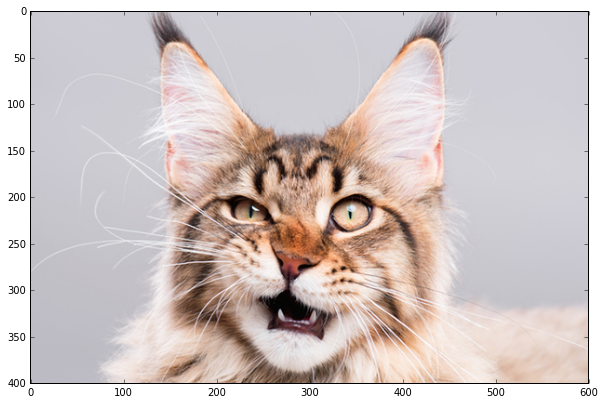

In [184]:
# Считываем кота и переводим его значения в диапазон от 0 от 1, чтобы было удобно работать с DoubleTensor
cat_image = plt.imread('test_cat.jpg')
cat_image = cat_image / np.max(cat_image)

plt.imshow(cat_image)

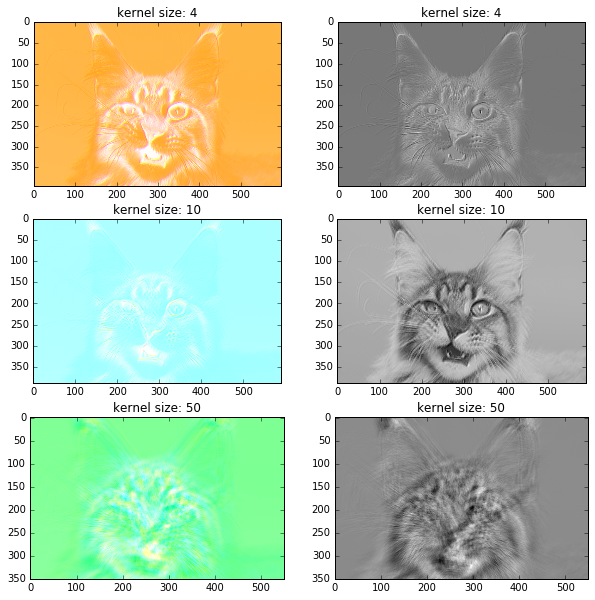

In [185]:
# сворачиваем кота с разным размером ядра 
fig, axes = plt.subplots(ncols=2, nrows=3)
cat_image = torch.from_numpy(cat_image)

# отрисовываем полученные картинки в цвете и без
for i, kernel_size in enumerate([4, 10, 50]):
    res = func_tools.convolution(cat_image, kernel_size) 
    title = "kernel size: {0}".format(kernel_size)
    
    # image in color
    axes[i, 0].imshow(res.numpy(), label=title)
    axes[i, 0].set_title(title)
    
    # grayscaled image
    axes[i, 1].imshow(func_tools.rgb2gray(res.numpy()), cmap = plt.get_cmap('gray'), label=title)
    axes[i, 1].set_title(title)
    
# стоит отметить, что результаты получились вполне ожидаемые: ядра с маленьким размером 
# почти не поменяли изображение, в то время как большой размер ядра привел к размазыванию изображения